In [1]:
# 딥러닝... 신경망 층을 많이 생성 성능을 높이는 기술
# 영상, 음성, 언어번역
# 텐서플로, 파이토치

In [2]:
# 다층퍼셉트론에서 은닉층을많이 두면 깊은 신경망
# 학습이 잘 안됨
#  - 그레이던트 소멸 문제
#  - 작은 데이터셋 문제(추정할 매개변수는 많은데 데이터는 적어 과소적합이 발생)
#  - 비용비싸(계산 시간이 증가)

In [3]:
# 방대한 데이터셋
# 학습알고리즘이 발전
#   - ReLu 활성 함수
#   - 규제 기법(가중치 감소, 드랍아웃, 조기 멈춤, 데이터 증대, 앙상블 등...)
#   - 다양한 손실함수와 옵티마이져 개발

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.9.1'

In [6]:
a = tf.random.uniform([2,3],0,1)
print(a)

tf.Tensor(
[[0.63585985 0.38298059 0.05531383]
 [0.17210901 0.11145461 0.44406927]], shape=(2, 3), dtype=float32)


In [7]:
import numpy as np

In [8]:
t = tf.random.uniform([2,3],0,1)
n = np.random.uniform(0,1,[2,3])

In [9]:
print(f"tensorflow로 생성한 텐서 : {t}")
print(f"numpy로 생성한 행렬 : {n}")

tensorflow로 생성한 텐서 : [[0.64098203 0.7307817  0.03785574]
 [0.5972682  0.22420955 0.00699854]]
numpy로 생성한 행렬 : [[0.14925283 0.78249382 0.27850105]
 [0.5603878  0.07029002 0.63256081]]


In [10]:
res = t+n
res

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.79023486, 1.5132755 , 0.3163568 ],
       [1.157656  , 0.29449958, 0.6395593 ]], dtype=float32)>

In [11]:
# 딥러닝에서 텐서 - 다차원 배열

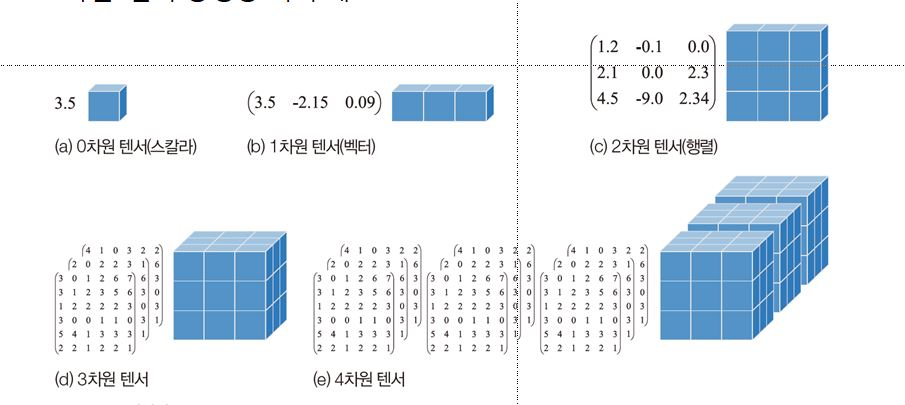

In [12]:
# 0 ~ 4 차원 구조의 텐서
# 1차원 iris 샘플하나
# 2차원 iris 샘플여러개, 명암 영상한장(흑백)
# 3차원 명암 영상여러개(흑백), 컬러영상 한장
# 4차원 컬러영상 여러개, 컬러동영상 하나
# 5차원 컬러동영상 여러개
from IPython import display
display.Image('E:/1 강남야간/img/018.jpg',width=500, height=500)

In [13]:
# 케라스가 제공하는 데이셋의 텐서구조를확인
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [14]:
(x_train,y_train),(x_test,y_test) = ds.mnist.load_data()

In [15]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [16]:
yy_train = tf.one_hot(y_train,10,dtype=tf.int8)
yy_train[0], y_train[0]

(<tf.Tensor: shape=(10,), dtype=int8, numpy=array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)>,
 5)

In [17]:
(x_train,y_train),(x_test,y_test) = ds.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [18]:
yy_train = tf.one_hot(y_train,10, dtype=tf.int8)
yy_train[0], y_train[0]

(<tf.Tensor: shape=(1, 10), dtype=int8, numpy=array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int8)>,
 array([6], dtype=uint8))

In [19]:
(x_train,y_train),(x_test,y_test) = ds.boston_housing.load_data()
x_train.shape, y_train.shape

((404, 13), (404,))

In [20]:
(x_train,y_train),(x_test,y_test) = ds.reuters.load_data()
x_train.shape, y_train.shape

((8982,), (8982,))

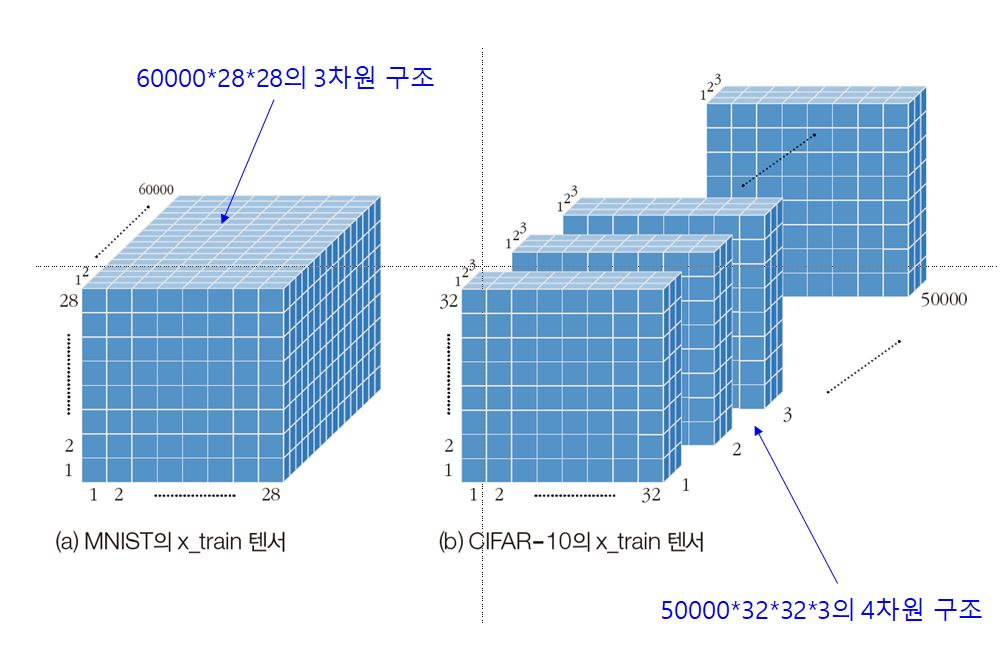

In [21]:
display.Image('E:/1 강남야간/img/019.jpg',width=500, height=500)

In [22]:
# 텐서플로 퍼셉트론 프로그래밍
# 퍼셉트론의 동작을 프로그램적으로 설명
import tensorflow as tf

In [23]:
# or data구축
x = [ 
        [0.0, 0.0],
        [0.0, 1.0],
        [1.0, 0.0],
        [1.0, 1.0]
    ]
y = [ [-1],[1],[1],[1]  ]

In [24]:
w = tf.Variable([[1.0],[1.0]])
b = tf.Variable(-0.5)
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [25]:
s = tf.add(tf.matmul(x,w),b)
o = tf.sign(s)

In [26]:
print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [27]:
# 텐서플로의 퍼셉트론 학습
# 가중치 초기화
w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b = tf.Variable(tf.zeros([1]))
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.01368093],
       [0.21633458]], dtype=float32)>

In [28]:
# 옵티마이저
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [29]:
# 전방계산식
def forward():
    s = tf.add(tf.matmul(x,w),b)
    o = tf.tanh(s)
    return o

In [30]:
# 손실함수
def loss():
    o = forward()
    return tf.reduce_mean((y-o)**2)

In [31]:
# 500 epoch(세대) 학습(100세대마다 정보 출력)
for i in range(500):
    opt.minimize(loss,var_list=[w,b])
    if(i%100 ==0): print(f"loss at epoch {i} : {loss().numpy()}")

loss at epoch 0 : 0.6459189057350159
loss at epoch 100 : 0.08895540237426758
loss at epoch 200 : 0.04162571579217911
loss at epoch 300 : 0.02630734071135521
loss at epoch 400 : 0.018998168408870697


In [32]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[2.5531735],
       [2.55337  ]], dtype=float32)>

In [33]:
#학습된 퍼셉트론으로 or데이터를 예측
o = forward()
o

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-0.8168129],
       [ 0.8866855],
       [ 0.8866435],
       [ 0.9992725]], dtype=float32)>

In [34]:
# 위의 텐서를 이용한 퍼셉트론의 프로그램문제점은 직접 신경망의 동작을 정의하고 코딩
# keras는 이걸 대신해 준다.
# 프로그램을 추상화(디테일은 숨긴다)
# 케라스는 추상화를 이용해서 프로그래밍한다 model.add(Dens(노드개수, 활성함수))
# 케라스의 철학... 인간을 위해 설계된 API

In [35]:
from tensorflow.keras.models import Sequential  # 층을 순서대로 쌓는다
from tensorflow.keras.layers import Dense # 은닉층(완전연결층)
from tensorflow.keras.optimizers import SGD 

In [36]:
# 데이터구축 -> 기계학습라이브러리 선택 -> 학습 ->예측
# 데이터구축 -> 신경망구조 설계 -> 학습 ->예측

In [37]:
x

[[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]

In [38]:
y

[[-1], [1], [1], [1]]

In [39]:
n_input = 2
n_output = 1

In [40]:
# 신경망 모델 설계
model =  Sequential()
model.add(Dense(units=n_output, activation='tanh'
                ,input_shape=(n_input,),kernel_initializer='random_uniform' ,
               bias_initializer='zero' ))

In [41]:
# 신경망 모델 사용하기 위해서 컴파일
model.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])

In [45]:
#  학습
model.fit(x,y,epochs=500,verbose=1)

Epoch 1/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0044 - mse: 0.0044
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0044 - mse: 0.0044
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0044 - mse: 0.0044
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0044 - mse: 0.0044
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0044 - mse: 0.0044
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0044 - mse: 0.0044
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0044 - mse: 0.0044
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0044 - mse: 0.0044
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0044 - mse: 0.0044
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0044 

1/1 [==============================] - 0s 12ms/step - loss: 0.0042 - mse: 0.0042
Epoch 90/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042
Epoch 91/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0042 - mse: 0.0042
Epoch 92/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041
Epoch 93/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0041 - mse: 0.0041
Epoch 94/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041
Epoch 95/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - mse: 0.0041
Epoch 96/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041
Epoch 97/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0041 - mse: 0.0041
Epoch 98/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0041 - mse: 0.0041
Epoch 99/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - m

1/1 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 177/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0039 - mse: 0.0039
Epoch 178/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0039 - mse: 0.0039
Epoch 179/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0039 - mse: 0.0039
Epoch 180/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0039 - mse: 0.0039
Epoch 181/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0039 - mse: 0.0039
Epoch 182/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0039 - mse: 0.0039
Epoch 183/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0039 - mse: 0.0039
Epoch 184/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0039 - mse: 0.0039
Epoch 185/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0039 - mse: 0.0039
Epoch 186/500
1/1 [==============================] - 0s 4ms/step - loss: 

1/1 [==============================] - 0s 6ms/step - loss: 0.0037 - mse: 0.0037
Epoch 264/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0037 - mse: 0.0037
Epoch 265/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0037 - mse: 0.0037
Epoch 266/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0037 - mse: 0.0037
Epoch 267/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 268/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0037 - mse: 0.0037
Epoch 269/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 270/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0037 - mse: 0.0037
Epoch 271/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0037 - mse: 0.0037
Epoch 272/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0037 - mse: 0.0037
Epoch 273/500
1/1 [==============================] - 0s 3ms/step - loss: 0

1/1 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 351/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0035 - mse: 0.0035
Epoch 352/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0035 - mse: 0.0035
Epoch 353/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0035 - mse: 0.0035
Epoch 354/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 355/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 356/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0035 - mse: 0.0035
Epoch 357/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0035 - mse: 0.0035
Epoch 358/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0035 - mse: 0.0035
Epoch 359/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 360/500
1/1 [==============================] - 0s 6ms/step - loss: 0

1/1 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 438/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0034 - mse: 0.0034
Epoch 439/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0034 - mse: 0.0034
Epoch 440/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 441/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0033 - mse: 0.0033
Epoch 442/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0033 - mse: 0.0033
Epoch 443/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.0033
Epoch 444/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0033 - mse: 0.0033
Epoch 445/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033
Epoch 446/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0033 - mse: 0.0033
Epoch 447/500
1/1 [==============================] - 0s 6ms/step - loss: 

In [46]:
res = model.predict(x)
res

1/1 [==============================] - 0s 75ms/step


array([[-0.9147609],
       [ 0.946604 ],
       [ 0.9466038],
       [ 0.9999332]], dtype=float32)